# Exploratory Data Analysis on data of Diabetic/Non-Diabetic patients to understand the underlying pattern causing this chronic disease

## INTRODUCTION:

Diabetes, a chronic disease which can cause due to two conditions:
   - When the pancreas does not produce enough insulin - Type I
   - When the body cannot effectively use the insulin it produces - Type II

Among the diabetes patients, almost 95% are of Type II and is largely the result of excess body weight and physical inactivity. However, the reason for Type I diabetes is still unknown.

#### Why is diabetes chronic and dangerous? 
Well, it can cause serious health hazards such as blindness, kidney failure, heart attacks, stroke, lower limb amputation, nerve damage and are highly at risk of diseases like Covid-19.

As per WHO (World Health Organization) report, 
-  The number of people with diabetes rose from 108 million in 1980 to 422 million in 2014. Prevalence has been rising more rapidly in low- and middle-income countries than in high-income countries
-  Between 2000 and 2019, there was a 3% increase in diabetes mortality rates by age
-  In 2019, diabetes and kidney disease due to diabetes caused an estimated 2 million deaths
-  In 2019, diabetes was the direct cause of 1.5 million deaths and 48% of all deaths due to diabetes occurred before the age of 70 years

Unlike Type I diabetes which is difficult to predict, Type II diabetes however, can be predicted and a timely treatment can reverse diabetes nowadays. There are few ways to identify early symptoms of diabetes such as inexpensive blood glucose measurement. Very simple steps such as maintaining healty body weight, staying physically active, eating a healthy diet, avoiding sugar and saturated fats, avoiding tobacco etc. can be effective in preventing or delaying the onset of type 2 diabetes.

With this analysis we shall try to draw conclusion on what are the major factors that can be used to diagnose Type II diabetes and what are the preventions that can be taken to stay away from this chronic disease.

## Importing Required Python Libraries

In [1]:
#Importing Numpy library
import numpy as np

#Importing Pandas library to work with the dataset
import pandas as pd

#Importing Plotly libray for plotting different plots
import plotly.express as px

#Importing KNN from scikit-learn library
from fancyimpute import KNN

#Importing matplotlib library
import matplotlib.pyplot as plt

#Importing Seaborn library
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 1000

## Reading the Dataset from the National Institute of Diabetes and Digestive and Kidney Diseases

In [3]:
# Reading the raw data received from the concerened Institute and keeping a copy of the raw data
raw_diabetes = pd.read_excel('pima-indians-diabetes (2).xlsx', header=None, names = ['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI','Diabetes_Pedigree_Function','Age','Outcome'])
raw_diabetes_copy = raw_diabetes.copy()
#Inspecting the first 5 rows with headers to understand the columns
raw_diabetes.head()

Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0          6.0    148.0            72.0            35.0      0.0  33.6   
1          1.0     85.0            66.0            29.0      0.0  26.6   
2          8.0    183.0            64.0             0.0      0.0  23.3   
3          1.0     89.0            66.0            23.0     94.0  28.1   
4          0.0    137.0            40.0            35.0    168.0  43.1   

   Diabetes_Pedigree_Function   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0

Now, we check the complete information about the dataset (Column name and data types). From this, we'll have an idea of number of columns, number of rows, different data types and number of non-null values in the dataset.

In [4]:
raw_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    float64
 1   Glucose                     768 non-null    float64
 2   Blood_Pressure              768 non-null    float64
 3   Skin_Thickness              768 non-null    float64
 4   Insulin                     768 non-null    float64
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    float64
 8   Outcome                     768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


From the above, we can see that there are 9 differentcolumns including the Outcome. There is no missing value in the dataset as the total number of records is 768 and number of non-null values also 768 in all columns. Also, the datatypes are all float for all columns which means there may need correction.

Now, as all the columns are of datatype float, we'll examin the data (first 20 rows) to identify the correct data types:

In [5]:
raw_diabetes.head(20)

Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0           6.0    148.0            72.0            35.0      0.0  33.6   
1           1.0     85.0            66.0            29.0      0.0  26.6   
2           8.0    183.0            64.0             0.0      0.0  23.3   
3           1.0     89.0            66.0            23.0     94.0  28.1   
4           0.0    137.0            40.0            35.0    168.0  43.1   
5           5.0    116.0            74.0             0.0      0.0  25.6   
6           3.0     78.0            50.0            32.0     88.0  31.0   
7          10.0    115.0             0.0             0.0      0.0  35.3   
8           2.0    197.0            70.0            45.0    543.0  30.5   
9           8.0    125.0            96.0             0.0      0.0   0.0   
10          4.0    110.0            92.0             0.0      0.0  37.6   
11         10.0    168.0            74.0             0.0      0.0  38.0   
12         10.0    139.0            80.0             0.0      0.0  27.1   
13          1.0    189.0            60.0            23.0    846.0  30.1   
14          5.0    166.0            72.0            19.0    175.0  25.8   
15          7.0    100.0             0.0             0.0      0.0  30.0   
16          0.0    118.0            84.0            47.0    230.0  45.8   
17          7.0    107.0            74.0             0.0      0.0  29.6   
18          1.0    103.0            30.0            38.0     83.0  43.3   
19          1.0    115.0            70.0            30.0     96.0  34.6   

    Diabetes_Pedigree_Function   Age  Outcome  
0                        0.627  50.0      1.0  
1                        0.351  31.0      0.0  
2                        0.672  32.0      1.0  
3                        0.167  21.0      0.0  
4                        2.288  33.0      1.0  
5                        0.201  30.0      0.0  
6                        0.248  26.0      1.0  
7                        0.134  29.0      0.0  
8                        0.158  53.0      1.0  
9                        0.232  54.0      1.0  
10                       0.191  30.0      0.0  
11                       0.537  34.0      1.0  
12                       1.441  57.0      0.0  
13                       0.398  59.0      1.0  
14                       0.587  51.0      1.0  
15                       0.484  32.0      1.0  
16                       0.551  31.0      1.0  
17                       0.254  31.0      1.0  
18                       0.183  33.0      0.0  
19                       0.529  32.0      1.0

We can confirm from the above result that column 'Diabetes Pedigree Function' and ' BMI' are having decimal values. Rest of the other columns are actually integer type. So we can type cast the rest of the columns including the Outcome column.

In [6]:
# Getting the column names all togather:
raw_diabetes.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Type casting the required columns to integer type
diabetes_corr_dtypes = raw_diabetes.astype({'Pregnancies':int,'Glucose':int,'Blood_Pressure':int,'Skin_Thickness':int,'Insulin':int,'Age':int,'Outcome':int})

In [8]:
# Checking the info once again to confirm the change:
diabetes_corr_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int32  
 1   Glucose                     768 non-null    int32  
 2   Blood_Pressure              768 non-null    int32  
 3   Skin_Thickness              768 non-null    int32  
 4   Insulin                     768 non-null    int32  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int32  
 8   Outcome                     768 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 33.1 KB


Now we reconfirm if the type has been changed sucessfully.

In [9]:
# Checking head(20) of the dataset to make sure the type has been changed.
diabetes_corr_dtypes.head(20)

Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0             6      148              72              35        0  33.6   
1             1       85              66              29        0  26.6   
2             8      183              64               0        0  23.3   
3             1       89              66              23       94  28.1   
4             0      137              40              35      168  43.1   
5             5      116              74               0        0  25.6   
6             3       78              50              32       88  31.0   
7            10      115               0               0        0  35.3   
8             2      197              70              45      543  30.5   
9             8      125              96               0        0   0.0   
10            4      110              92               0        0  37.6   
11           10      168              74               0        0  38.0   
12           10      139              80               0        0  27.1   
13            1      189              60              23      846  30.1   
14            5      166              72              19      175  25.8   
15            7      100               0               0        0  30.0   
16            0      118              84              47      230  45.8   
17            7      107              74               0        0  29.6   
18            1      103              30              38       83  43.3   
19            1      115              70              30       96  34.6   

    Diabetes_Pedigree_Function  Age  Outcome  
0                        0.627   50        1  
1                        0.351   31        0  
2                        0.672   32        1  
3                        0.167   21        0  
4                        2.288   33        1  
5                        0.201   30        0  
6                        0.248   26        1  
7                        0.134   29        0  
8                        0.158   53        1  
9                        0.232   54        1  
10                       0.191   30        0  
11                       0.537   34        1  
12                       1.441   57        0  
13                       0.398   59        1  
14                       0.587   51        1  
15                       0.484   32        1  
16                       0.551   31        1  
17                       0.254   31        1  
18                       0.183   33        0  
19                       0.529   32        1

From the above result, it is evident that the data types have been updated from float to integer. But one interesting point to notice that even thow the dataset does not have any null values, it has lots of zeros in different columns. Where few columns can have 0 values, for few zero is not acceptable. To understand the data properly, we must examine the fewquency of unique values for the columns which cannot support zero as a value.

Such columns are:
-  Glucose
-  Blood Pressure
-  Skin Thickness
-  Insulin
-  BMI
-  Diabetes Pedigree Function
-  Age

So, we're making a list of these columns to examine the dataset:

In [10]:
# List of columns that cannot have zero value
non_zero_vars = ['Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']

In [11]:
# Checking the total count of zero values in the above mentioned fields
diabetes_corr_dtypes[non_zero_vars].isin([0]).sum(axis=0)

Glucose                         5
Blood_Pressure                 35
Skin_Thickness                227
Insulin                       374
BMI                            11
Diabetes_Pedigree_Function      0
Age                             0
dtype: int64

This result shows that the columns that are having 0 are as below:
-  Glucose (5)
-  Blood Pressure (35)
-  Skin Thickness (227)
-  Insulin (374)
-  BMI (11)

But, Diabetes Pedigree Function and Age columns are not having any 0 value.

To understand the amount of number of zero values for each of the above 5 columns, we try to see the percentage of zeros.

In [12]:
# Updating the list of columns that has but cannot have 0 as values:
non_zero_vars.remove('Age')
non_zero_vars.remove('Diabetes_Pedigree_Function')
non_zero_vars

['Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI']

In [13]:
# Checking the percentage of zeros for these 5 columns upto two decimal points
round(100*diabetes_corr_dtypes[non_zero_vars].isin([0]).sum()/len(diabetes_corr_dtypes.index),2)

Glucose            0.65
Blood_Pressure     4.56
Skin_Thickness    29.56
Insulin           48.70
BMI                1.43
dtype: float64

From the above result, we can see that the amount of zero as value is very high in columns Skin Thickness and Insulin. With these many NaN values, the columns could have been deleted but it will reduce the size of the data drastically, hence we replace them with mean values. For other three columns i.e. Glucose, Blood Pressure and BMI, replacing with mean value works well with these features.

Before moving to the replacement, keeping a copy for safety

In [14]:
# Creating another copy of the dataset for zero value replacement
diabetes_nonzero = diabetes_corr_dtypes.copy()

For Glucose, Blood Pressure and BMI, we'll simply replace the 0 values with overall mean:

In [15]:
# Replacing 0's of Glucose with the overall mean
diabetes_nonzero.loc[(diabetes_nonzero['Glucose']==0),['Glucose']] = diabetes_nonzero['Glucose'].mean()

# Replacing 0's of Blood Pressure with the overall mean
diabetes_nonzero.loc[(diabetes_nonzero['Blood_Pressure']==0),['Blood_Pressure']] = diabetes_nonzero['Blood_Pressure'].mean()

# Replacing 0's of BMI with the overall mean
diabetes_nonzero.loc[(diabetes_nonzero['BMI']==0),['BMI']] = diabetes_nonzero['BMI'].mean()

For Skin Thickness and Insulin, since the number of 0 is very high, we'll replace the zeros by using an advanced imputation technique KNN. However, we don't want to impute any 0 values from Pregnancies or Outcome column since having a 0 value is valid. 

In KNN method only NaN values are imputed. Hence, we first have to update the zeros to NaN.

In [16]:
diabetes_nonzero.Skin_Thickness[diabetes_nonzero.Skin_Thickness == 0] = np.nan
diabetes_nonzero.Insulin[diabetes_nonzero.Insulin == 0] = np.nan

In [17]:
# Creating KNN object
knn_imputer = KNN()

#Creating a copy of the dataframe
diabetes_knn=diabetes_nonzero.copy(deep=True)
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

Imputing row 1/768 with 1 missing, elapsed time: 0.119
Imputing row 101/768 with 2 missing, elapsed time: 0.126
Imputing row 201/768 with 1 missing, elapsed time: 0.129
Imputing row 301/768 with 2 missing, elapsed time: 0.131
Imputing row 401/768 with 2 missing, elapsed time: 0.133
Imputing row 501/768 with 0 missing, elapsed time: 0.136
Imputing row 601/768 with 1 missing, elapsed time: 0.139
Imputing row 701/768 with 0 missing, elapsed time: 0.142


Checking the percentage of data with 0 values for all 5 columns to confirm that the 0 values have been replaced with mean values.

In [18]:
# Checking the percentage of zeros for all columns upto two decimal points
round(100*diabetes_knn.isin([0]).sum()/len(diabetes_knn.index),2)

Pregnancies                   14.45
Glucose                        0.00
Blood_Pressure                 0.00
Skin_Thickness                 0.00
Insulin                        0.00
BMI                            0.00
Diabetes_Pedigree_Function     0.00
Age                            0.00
Outcome                       65.10
dtype: float64

So, above result shows that the there no more 0 as a value in the columns except Pregnancies and Outcome.

Now, only columns that are having 0 as value are:
-  Pregnancies
-  Outcome

These two columns can have 0 as valid value.

Now we check the unique values for columns Pregnancies and Outcome.

For the Outcome variable, the two values 1 and 0 have meanings as below:
-  1 : Diabetic
-  0 : Non-Diabetic

Now, we check if there are any outliers in our data. Because, if there are outliers, it can impact the outcome of the analysis. If there are any outliers in any of the columns, we treat them with a proper method.

In [19]:
# Box plot to check if there are any outliers
fig = px.box(diabetes_knn, y="Pregnancies", width=800, height=400,
            labels={"Pregnancies": "Number of times got Pregnant"})
fig.show()

From the above box plot we can see that it has outliers. To treatthe outliers, we cap them at upper fence.

Treating outlier for variable Pregnancies by capping the values at upper fence which is 13

In [20]:
#Capping outliers at upper fence
diabetes_knn['Pregnancies'] = np.where(diabetes_knn['Pregnancies'] >13, 13,diabetes_knn['Pregnancies'])

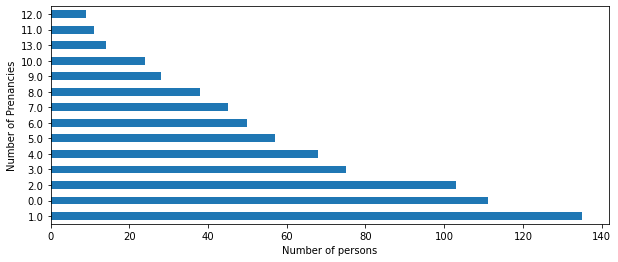

In [21]:
# Creating a bar plot to understand the frequency of data
plt.figure(figsize=[10,4])
diabetes_knn.Pregnancies.value_counts().plot.barh()
plt.xlabel('Number of persons')
plt.ylabel('Number of Prenancies')
plt.show()

The above plot shows that there are most number of people with preganancy once and and none, as the number of pregnancy time increases, the count reduces.

In [22]:
# Box plot to check if there are any outliers
fig = px.box(diabetes_knn, y="BMI", width=800, height=400,
            labels={"BMI": "BMI units"})
fig.show()

Treating outlier for variable BMI by capping the values at upper fence which is 50

In [23]:
#Capping outliers at upper fence
diabetes_knn['BMI'] = np.where(diabetes_knn['BMI'] >50, 50,diabetes_knn['BMI'])

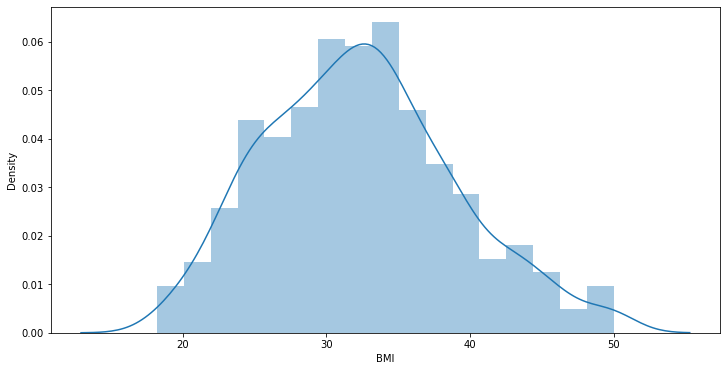

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(diabetes_knn['BMI'])
plt.show()

From the above plot, we can understand that the data is normally distributed. 

In [25]:
# Box plot to check if there are any outliers
fig = px.box(diabetes_knn, y="Glucose", width=800, height=400,
            labels={"Glucose": "Glucose Level"})
fig.show()

From the above plot of Glucose, we don't see any outliers. Hence no need to treat them. However, we have to understand the distribution.

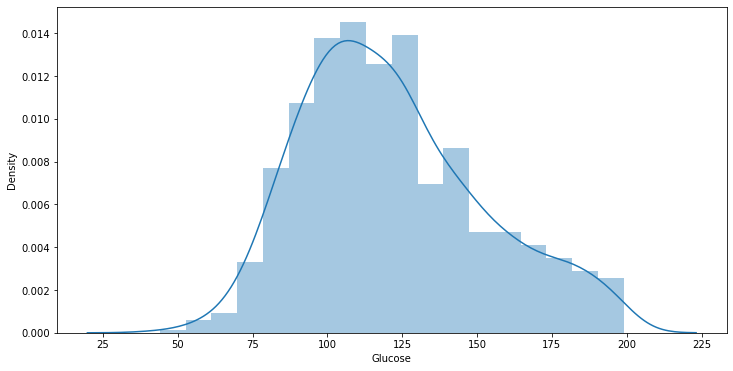

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(diabetes_knn['Glucose'])
plt.show()

Looks like the data is almost normally distributed.

In [27]:
# Box plot to check if there are any outliers
fig = px.box(diabetes_knn, y="Blood_Pressure", width=800, height=400,
            labels={"Blood_Pressure": "Blood Pressure Level"})
fig.show()

The above box plot shows that Blood Pressure has outliers at both end and so we need to treat them in both ways.

In [28]:
#Capping outliers at upper fence
diabetes_knn['Blood_Pressure'] = np.where(diabetes_knn['Blood_Pressure'] >104, 104,diabetes_knn['Blood_Pressure'])

#Capping outliers at lower fence
diabetes_knn['Blood_Pressure'] = np.where(diabetes_knn['Blood_Pressure'] <40, 40,diabetes_knn['Blood_Pressure'])

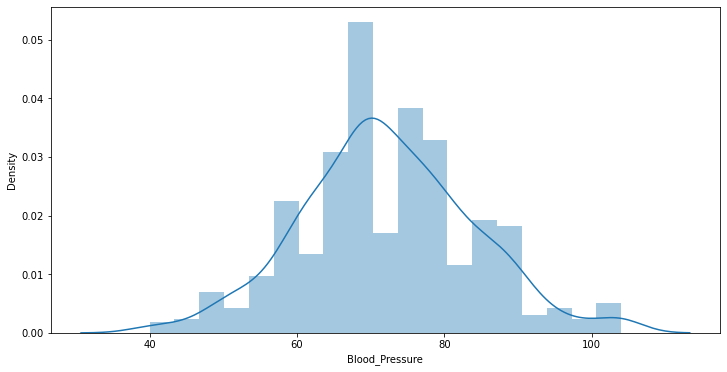

In [29]:
plt.figure(figsize=(12,6))
sns.distplot(diabetes_knn['Blood_Pressure'])
plt.show()

The Blood pressure data also looks normally distributed 

In [30]:
# Box plot to check if there are any outliers
fig = px.box(diabetes_knn, y="Skin_Thickness", width=800, height=400,
            labels={"Skin_Thickness": "Skin Thickness Level"})
fig.show()

The above box plot shows that Skin Thickness has outliers at upper end and so we need to treat them in upper fence.

In [31]:
#Capping outliers at upper fence
diabetes_knn['Skin_Thickness'] = np.where(diabetes_knn['Skin_Thickness'] >52, 52,diabetes_knn['Skin_Thickness'])

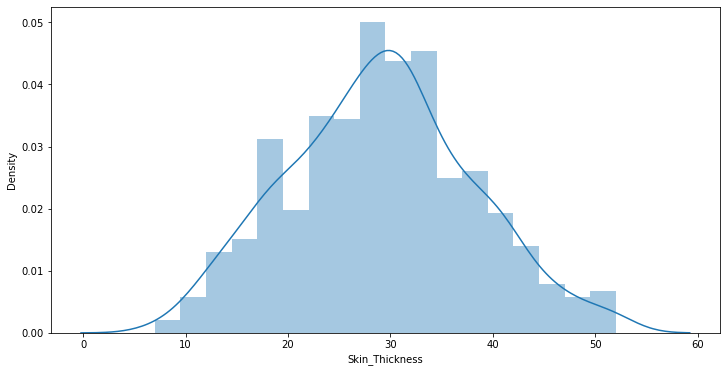

In [32]:
plt.figure(figsize=(12,6))
sns.distplot(diabetes_knn['Skin_Thickness'])
plt.show()

Skin Thickness data is also normally distributed.

In [33]:
# Box plot to check if there are any outliers
fig = px.box(diabetes_knn, y="Insulin", width=800, height=400,
            labels={"Insulin": "Insulin Level"})
fig.show()

The above box plot shows that Insulin has outliers at upper end and so we need to treat them in upper fence.

In [34]:
#Capping outliers at upper fence
diabetes_knn['Insulin'] = np.where(diabetes_knn['Insulin'] > 335, 335,diabetes_knn['Insulin'])

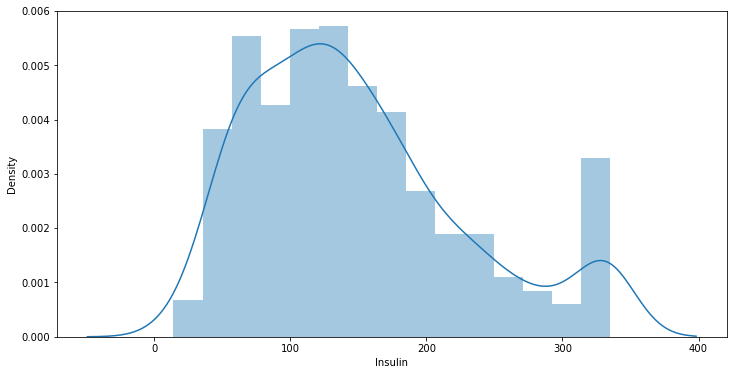

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(diabetes_knn['Insulin'])
plt.show()

In [36]:
# Box plot to check if there are any outliers
fig = px.box(diabetes_knn, y="Diabetes_Pedigree_Function", width=800, height=400,
            labels={"Diabetes_Pedigree_Function": "Diabetes Pedigree Function"})
fig.show()

The above box plot shows that Diabetes Pedigree Function has outliers at upper end and so we need to treat them in upper fence.

In [37]:
#Capping outliers at upper fence
diabetes_knn['Diabetes_Pedigree_Function'] = np.where(diabetes_knn['Diabetes_Pedigree_Function'] > 1.191, 1.191,diabetes_knn['Diabetes_Pedigree_Function'])

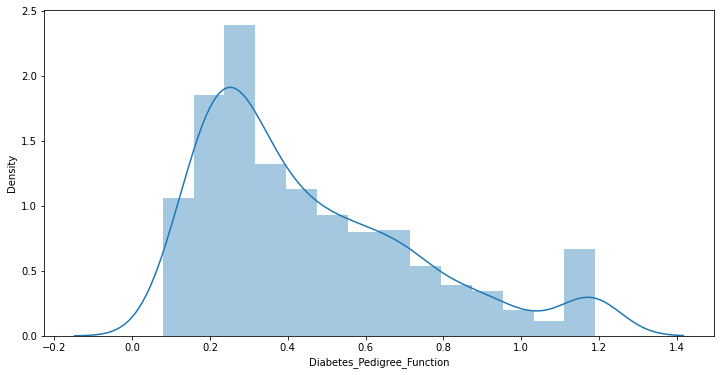

In [38]:
plt.figure(figsize=(12,6))
sns.distplot(diabetes_knn['Diabetes_Pedigree_Function'])
plt.show()

In [39]:
# Box plot to check if there are any outliers
fig = px.box(diabetes_knn, y="Age", width=800, height=400,
            labels={"Age": "Age"})
fig.show()

Even though we have some outliers as it seem from the above plot, the upper limit is 81 which is possible. Hence, we don't treat them as outliers and no need to treat them.

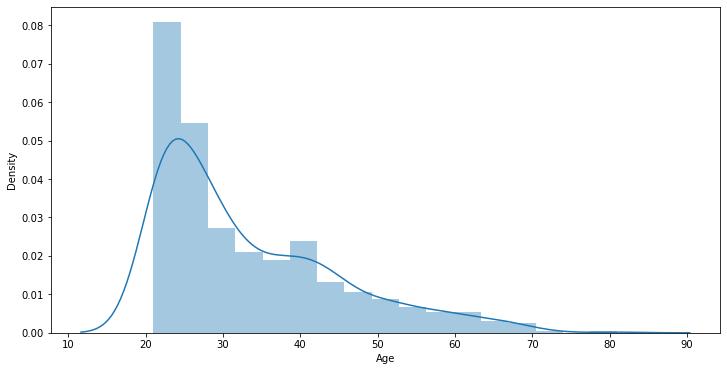

In [40]:
plt.figure(figsize=(12,6))
sns.distplot(diabetes_knn['Age'])
plt.show()

From the above plot, we can have an inference that there are more people in the age range of 20 to 50 years.

## Imbalance Percentage on the Target Variable (Outcome)

In [41]:
diabetes = diabetes_knn.copy()

In [42]:
diabetes.Outcome.value_counts(normalize=True)

0.0    0.651042
1.0    0.348958
Name: Outcome, dtype: float64

The imbalance percentage for diabetic are 34.9% and for non-diabetic are 65.1%

### Plotting Imbalance Percentage

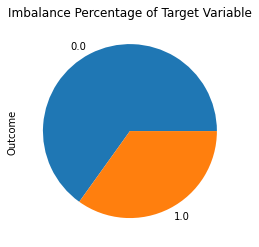

In [43]:
plt.title('Imbalance Percentage of Target Variable')
diabetes.Outcome.value_counts(normalize=True).plot.pie()
plt.show()

#### Creating new datasets for diabetic as diabetes_1 and for non-diabetic as diabetes_0

In [44]:
diabetes_1 = diabetes.loc[(diabetes['Outcome']==1),:]
diabetes_0 = diabetes.loc[(diabetes['Outcome']==0),:]

### Univariate analysis on number of pregnancies for both biabetic and non-diabetic data

<Figure size 432x288 with 0 Axes>

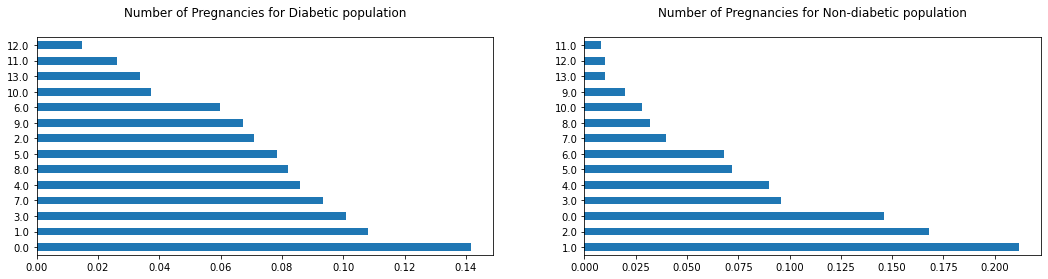

In [45]:
plt.figure(1)
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.title("Number of Pregnancies for Diabetic population\n")
diabetes_1.Pregnancies.value_counts(normalize=True).plot.barh()
plt.subplot(122)
plt.title("Number of Pregnancies for Non-diabetic population\n")
diabetes_0.Pregnancies.value_counts(normalize=True).plot.barh()
plt.show()

The above comparision shows that there is a tendency of being diabetic when the number of pregnancy is higher

### Univariate analysis on Glucose for both biabetic and non-diabetic data

<Figure size 432x288 with 0 Axes>

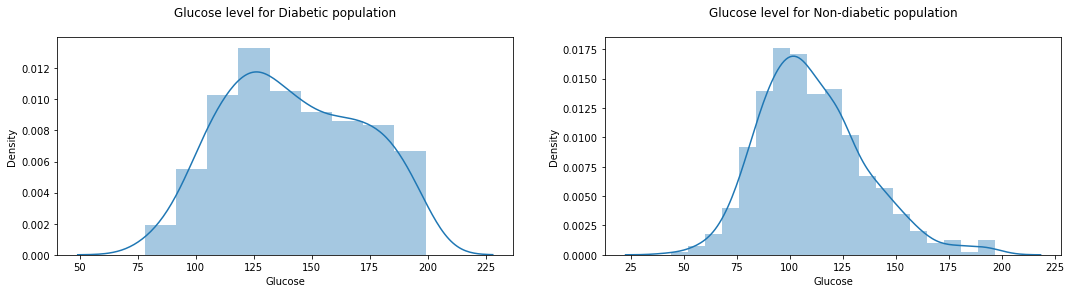

In [46]:
plt.figure(1)
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.title("Glucose level for Diabetic population\n")
sns.distplot(diabetes_1.Glucose)
plt.subplot(122)
plt.title("Glucose level for Non-diabetic population\n")
sns.distplot(diabetes_0.Glucose)
plt.show()

Plot shows, people having diabetes are mostly having higher glucose level

### Univariate analysis on Blood Pressure for both biabetic and non-diabetic data

<Figure size 432x288 with 0 Axes>

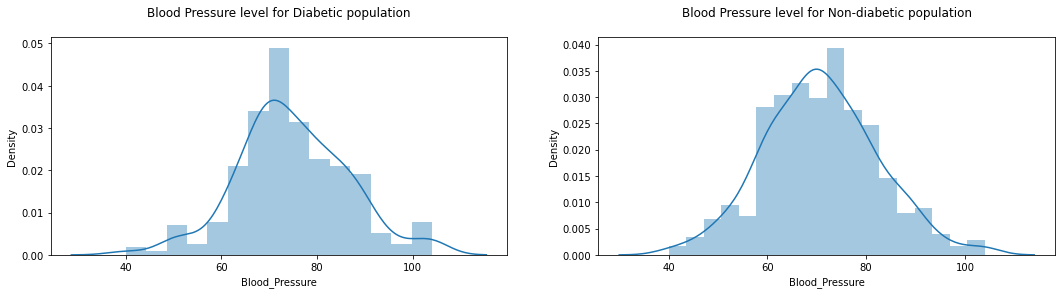

In [47]:
plt.figure(1)
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.title("Blood Pressure level for Diabetic population\n")
sns.distplot(diabetes_1.Blood_Pressure)
plt.subplot(122)
plt.title("Blood Pressure level for Non-diabetic population\n")
sns.distplot(diabetes_0.Blood_Pressure)
plt.show()

Blood pressure looks similar for diabetic and non-diabetic population

### Univariate analysis on Skin Thickness for both biabetic and non-diabetic data

<Figure size 432x288 with 0 Axes>

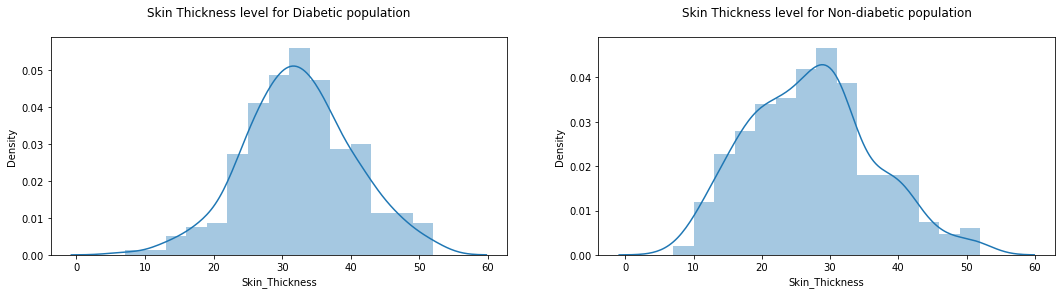

In [48]:
plt.figure(1)
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.title("Skin Thickness level for Diabetic population\n")
sns.distplot(diabetes_1.Skin_Thickness)
plt.subplot(122)
plt.title("Skin Thickness level for Non-diabetic population\n")
sns.distplot(diabetes_0.Skin_Thickness)
plt.show()

The mean skin thickness looks higher in case of diabetic population

### Univariate analysis on Insulin for both biabetic and non-diabetic data

<Figure size 432x288 with 0 Axes>

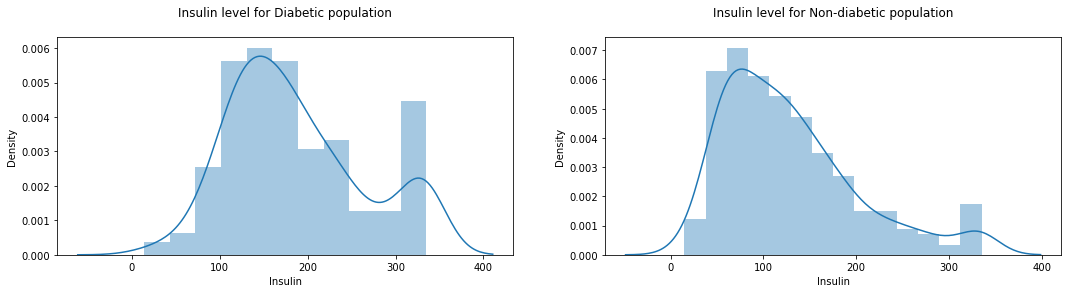

In [49]:
plt.figure(1)
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.title("Insulin level for Diabetic population\n")
sns.distplot(diabetes_1.Insulin)
plt.subplot(122)
plt.title("Insulin level for Non-diabetic population\n")
sns.distplot(diabetes_0.Insulin)
plt.show()

Higher insulin level indicates to Type II diabetes and the same shows from the plot above. 

### Univariate analysis on BMI for both biabetic and non-diabetic data

<Figure size 432x288 with 0 Axes>

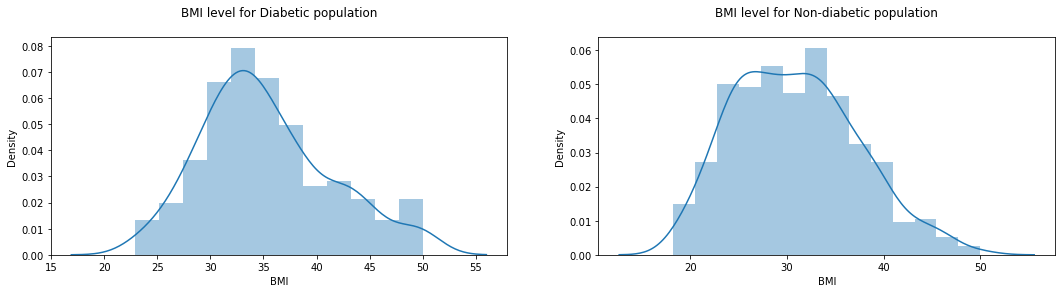

In [50]:
plt.figure(1)
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.title("BMI level for Diabetic population\n")
sns.distplot(diabetes_1.BMI)
plt.subplot(122)
plt.title("BMI level for Non-diabetic population\n")
sns.distplot(diabetes_0.BMI)
plt.show()

The diabetic population tends to have a higher BMI than the non-diabetic population

### Univariate analysis on Diabetes_Pedigree_Function for both biabetic and non-diabetic data

<Figure size 432x288 with 0 Axes>

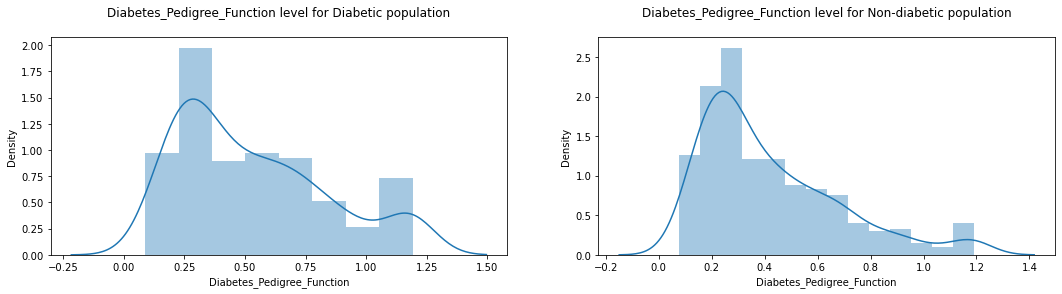

In [51]:
plt.figure(1)
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.title("Diabetes_Pedigree_Function level for Diabetic population\n")
sns.distplot(diabetes_1.Diabetes_Pedigree_Function)
plt.subplot(122)
plt.title("Diabetes_Pedigree_Function level for Non-diabetic population\n")
sns.distplot(diabetes_0.Diabetes_Pedigree_Function)
plt.show()

### Univariate analysis on Age for both biabetic and non-diabetic data

<Figure size 432x288 with 0 Axes>

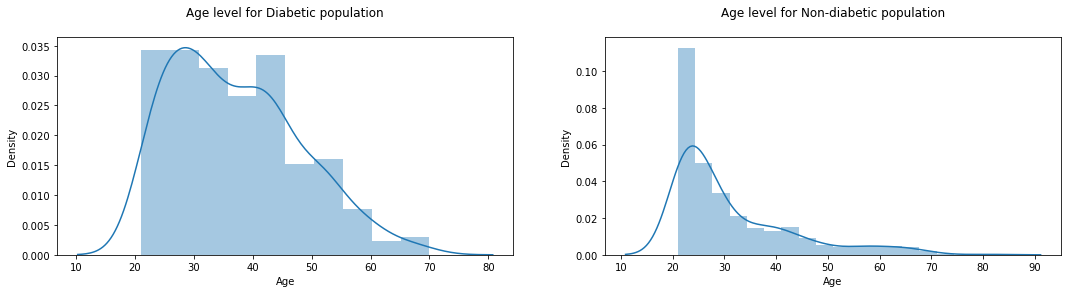

In [52]:
plt.figure(1)
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.title("Age level for Diabetic population\n")
sns.distplot(diabetes_1.Age)
plt.subplot(122)
plt.title("Age level for Non-diabetic population\n")
sns.distplot(diabetes_0.Age)
plt.show()

The diabetic population mean age is higher than that of non-diabetic population.

### Now we try to find the correlation between the numerical variables for type of populations:

In [53]:
#For diabetic population:
diabetes_1[['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']].corr()

Pregnancies   Glucose  Blood_Pressure  \
Pregnancies                    1.000000 -0.057085        0.141681   
Glucose                       -0.057085  1.000000        0.097290   
Blood_Pressure                 0.141681  0.097290        1.000000   
Skin_Thickness                -0.073039  0.029143        0.124568   
Insulin                       -0.085315  0.521157        0.012343   
BMI                           -0.127886  0.063148        0.226129   
Diabetes_Pedigree_Function    -0.025385 -0.003472       -0.020912   
Age                            0.448619  0.111951        0.298777   

                            Skin_Thickness   Insulin       BMI  \
Pregnancies                      -0.073039 -0.085315 -0.127886   
Glucose                           0.029143  0.521157  0.063148   
Blood_Pressure                    0.124568  0.012343  0.226129   
Skin_Thickness                    1.000000  0.163393  0.538611   
Insulin                           0.163393  1.000000  0.180460   
BMI                               0.538611  0.180460  1.000000   
Diabetes_Pedigree_Function        0.045294 -0.008748  0.064694   
Age                              -0.155532  0.101153 -0.182143   

                            Diabetes_Pedigree_Function       Age  
Pregnancies                                  -0.025385  0.448619  
Glucose                                      -0.003472  0.111951  
Blood_Pressure                               -0.020912  0.298777  
Skin_Thickness                                0.045294 -0.155532  
Insulin                                      -0.008748  0.101153  
BMI                                           0.064694 -0.182143  
Diabetes_Pedigree_Function                    1.000000 -0.060882  
Age                                          -0.060882  1.000000

In [54]:
#For non-diabetic population:
diabetes_0[['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']].corr()

Pregnancies   Glucose  Blood_Pressure  \
Pregnancies                    1.000000  0.081981        0.210035   
Glucose                        0.081981  1.000000        0.204687   
Blood_Pressure                 0.210035  0.204687        1.000000   
Skin_Thickness                 0.136542  0.159630        0.241173   
Insulin                        0.073470  0.663448        0.164490   
BMI                            0.005257  0.117844        0.262900   
Diabetes_Pedigree_Function    -0.087071  0.057926       -0.013091   
Age                            0.572776  0.217172        0.309041   

                            Skin_Thickness   Insulin       BMI  \
Pregnancies                       0.136542  0.073470  0.005257   
Glucose                           0.159630  0.663448  0.117844   
Blood_Pressure                    0.241173  0.164490  0.262900   
Skin_Thickness                    1.000000  0.186991  0.663793   
Insulin                           0.186991  1.000000  0.186056   
BMI                               0.663793  0.186056  1.000000   
Diabetes_Pedigree_Function        0.037599  0.088091  0.100362   
Age                               0.179009  0.263646  0.020021   

                            Diabetes_Pedigree_Function       Age  
Pregnancies                                  -0.087071  0.572776  
Glucose                                       0.057926  0.217172  
Blood_Pressure                               -0.013091  0.309041  
Skin_Thickness                                0.037599  0.179009  
Insulin                                       0.088091  0.263646  
BMI                                           0.100362  0.020021  
Diabetes_Pedigree_Function                    1.000000  0.041861  
Age                                           0.041861  1.000000

### For better understanding the correlation between the variables, plotting a heatmap for both Diabetic and Non-diabetic population:


<Figure size 432x288 with 0 Axes>

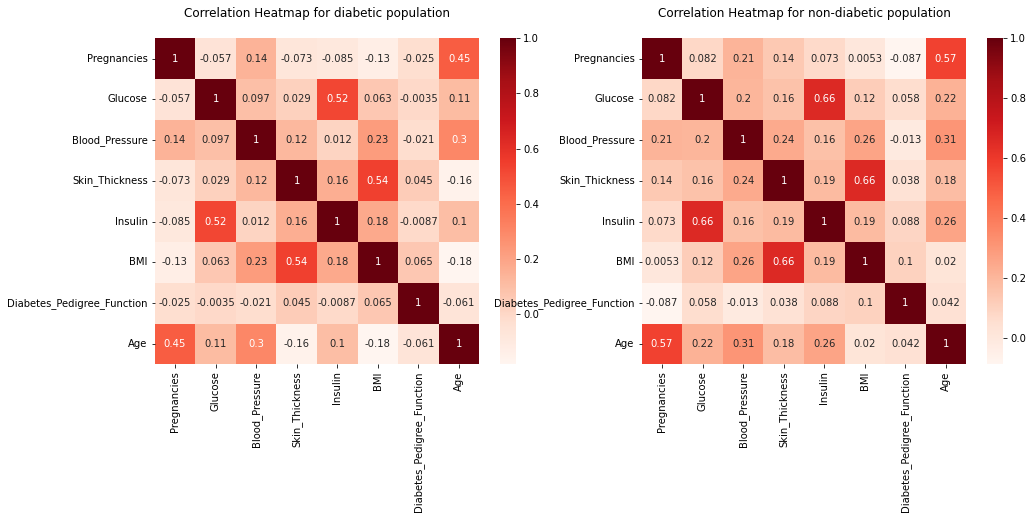

In [55]:
plt.figure(1)
plt.figure(figsize=[16,6])
plt.subplot(121)
plt.title("Correlation Heatmap for diabetic population\n")
sns.heatmap(diabetes_1[['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']].corr(), cmap='Reds', annot=True)
plt.subplot(122)
plt.title("Correlation Heatmap for non-diabetic population\n")
sns.heatmap(diabetes_0[['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']].corr(), cmap='Reds', annot=True)
plt.show()

From the above heatmaps, we can see that Age and Pregnancy are correlated. Hence we can use Age only for our analysis. Also we see that BMI and Skin Thickness are somewhat related and also there are some relation between Insulin and Glucose.

Hence, we can drop the Pregnancy, Skin Thickness and Insulin columns and we can use rest of the columns for Machine Leanring model building.